In [16]:
import numpy as np
import  matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
import sklearn.model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import metrics
import itertools as it
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import cross_validation
from sklearn import tree
from sklearn.utils import resample

%matplotlib inline

# Parte 1
Grafica 8.8

In [87]:
cleveland = pd.read_csv('processed.cleveland.data',header=None)
labels = ['age','sex','cp','trestbps','chol','fbs ','restecg', 'thalach','exang','oldpeak', 'slope', 'ca', 'thal', 'num' ]
cleveland.columns = labels

In [88]:
cleveland.ca = list(map(lambda x : float(x) if x!='?' else None,cleveland.ca))
cleveland.thal = list(map(lambda x : float(x) if x!='?' else None,cleveland.thal))
cleveland = cleveland.dropna()
test, train = train_test_split(cleveland,test_size = 0.60)
x_features = cleveland.columns[:-2]

In [89]:
def cont(pred):
    c    = np.array([0,0,0,0,0])
    temp = np.array([0,1,2,3,4])
    for i in pred:
        c[int(i)] += 1
    return temp[c==max(c)][0]

In [90]:
baum = DecisionTreeClassifier().fit(train[x_features],train.num)
pr = baum.predict(test[x_features])
fehler = 1 - accuracy_score(test.num,pr)

In [66]:
from sklearn.ensemble import BaggingClassifier

trees = np.linspace(1,100,100)
error_rfc = np.ones(len(trees))
error_rfc_oob = np.ones(len(trees))
error_bc = np.ones(len(trees))
error_bc_oob = np.ones(len(trees))

for tr in range(1,len(trees)): 
    rfc = RandomForestClassifier(n_estimators=tr, oob_score = True)
    rfc.fit(train[x_features],train.num)
    predict_rfc = rfc.predict(test[x_features])
    
    bc = BaggingClassifier(n_estimators = tr, oob_score = True)
    bc.fit(train[x_features],train.num)
    predict_bc = bc.predict(test[x_features])
    
    error_rfc[tr-1] = 1 - accuracy_score(test.num,predict_rfc)
    error_rfc_oob[tr-1] = 1 - rfc.oob_score_
    error_bc[tr-1] = 1 - accuracy_score(test.num,predict_bc)
    error_bc_oob[tr-1] = 1 -bc.oob_score_

/home/mneira011/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/mneira011/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/mneira011/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/mneira011/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/home/mneira011/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWa

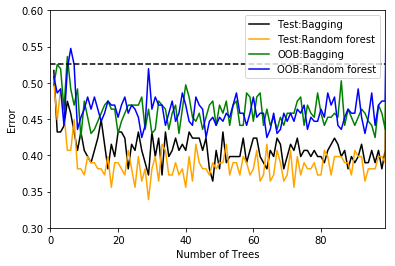

In [91]:
plt.plot(trees,error_bc, c= 'black', label = 'Test:Bagging')
plt.plot(trees,error_rfc, c= 'orange', label = 'Test:Random forest')
plt.plot(trees,error_bc_oob, c= 'green', label = 'OOB:Bagging')
plt.plot(trees,error_rfc_oob, c= 'blue', label = 'OOB:Random forest')
plt.plot([0,99],[fehler,fehler],c='black',linestyle='--')
plt.xlabel('Number of Trees')
plt.ylabel('Error')
plt.ylim(0.3,0.6)
plt.xlim(0,99)
plt.legend()

Grafica 8.10

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [75]:
oj = pd.read_csv('OJ.csv')
oj['purchaseNum'] = list(map(lambda x : 1 if x=="CH" else 0 , oj.Purchase))
test, train = train_test_split(oj,test_size = 0.50)
x_features = ['WeekofPurchase','StoreID','PriceCH','PriceMM','DiscCH','DiscMM','SpecialCH','SpecialMM','LoyalCH',
              'SalePriceMM','SalePriceCH','PriceDiff', 'PctDiscMM','PctDiscCH','ListPriceDiff','STORE']

In [81]:
error4 = np.ones(100)
error7 = np.ones(100)
error14 = np.ones(100)
trees = np.linspace(1,100,100)
p = len(x_features)
for tr in range(1,len(trees)):
    #m=p**0.5
    clf1 = RandomForestClassifier(n_estimators=tr,max_features='sqrt')
    clf1.fit(train[x_features],train.purchaseNum)
    predict1 = clf1.predict(test[x_features])
    error4[tr-1] = 1 - accuracy_score(test.purchaseNum,predict1)
    #m=p/2
    clf2 = RandomForestClassifier(n_estimators=tr,max_features=7)
    clf2.fit(train[x_features],train.purchaseNum)
    predict2 = clf2.predict(test[x_features])
    error7[tr-1] = 1 - accuracy_score(test.purchaseNum,predict2)
    #m=p
    clf3 = RandomForestClassifier(n_estimators=tr,max_features=p)
    clf3.fit(train[x_features],train.purchaseNum)
    predict3 = clf3.predict(test[x_features])
    error14[tr-1] = 1 - accuracy_score(test.purchaseNum,predict3)

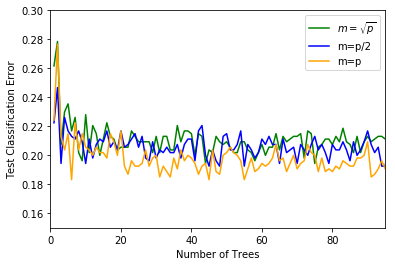

In [85]:
plt.plot(trees,error4, c= 'green', label = r'$m=\sqrt{p}$')
plt.plot(trees,error7, c= 'blue', label = 'm=p/2')
plt.plot(trees,error14, c= 'orange', label = 'm=p')
plt.xlabel('Number of Trees')
plt.ylabel('Test Classification Error')
plt.ylim(0.15,0.3)
plt.xlim(0,95)
plt.legend()

# Parte 2 

In [18]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
#Logistic regression
lr = LogisticRegression().fit(train[x_features],train.purchaseNum)

#Linear discriminant analysis
lda = LinearDiscriminantAnalysis().fit(train[x_features],train.purchaseNum)

#Classification tree
dtc = DecisionTreeClassifier().fit(train[x_features],train.purchaseNum)

#Random forest
rfc = RandomForestClassifier().fit(train[x_features],train.purchaseNum)

/home/mneira011/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [19]:
from sklearn.metrics import precision_recall_curve
precision_lr, recall_lr, _ = precision_recall_curve(test.purchaseNum, lr.predict_proba(test[x_features])[:,1])
precision_lda, recall_lda, _ = precision_recall_curve(test.purchaseNum, lda.predict_proba(test[x_features])[:,1])
precision_dtc, recall_dtc, _ = precision_recall_curve(test.purchaseNum, dtc.predict_proba(test[x_features])[:,1])
precision_rfc, recall_rfc, _ = precision_recall_curve(test.purchaseNum, rfc.predict_proba(test[x_features])[:,1])

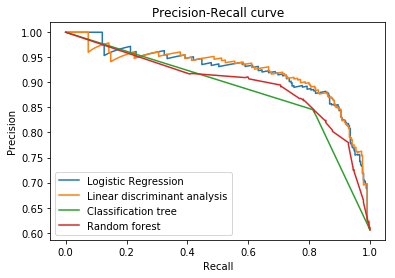

In [24]:
plt.plot(recall_lr,precision_lr,label = 'Logistic Regression')
plt.plot(recall_lda,precision_lda,label = 'Linear discriminant analysis')
plt.plot(recall_dtc,precision_dtc,label = 'Classification tree')
plt.plot(recall_rfc,precision_rfc,label = 'Random forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()

In [37]:
import scipy.integrate as integrate
def integ(recall,precision):
    recall = recall.tolist()
    precision = precision.tolist()
    recall.reverse()
    precision.reverse()
    a = 0
    for i in range(len(recall)-1):
        dx = recall[i+1] - recall[i]
        a+= dx*precision[i+1]
    return a

In [38]:
a_lr = integ(recall_lr,precision_lr)
a_lda = integ(recall_lda,precision_lda)
a_dtc = integ(recall_dtc,precision_dtc)
a_rfc = integ(recall_rfc,precision_rfc)

In [39]:
print('Logistic regression', a_lr)
print('Linear discriminant analysis', a_lda)
print('Classification tree', a_dtc)
print('Random forest', a_rfc)

Logistic regression 0.9218712930031804
Linear discriminant analysis 0.9225653773148672
Classification tree 0.8032564478412962
Random forest 0.8758237583755718


## Respuesta
Teniendo en cuenta los resultados de precision-recall, analizados a partir del area bajo las curvas generadas por cada uno de los algoritmos se puede afirmar que el mejor para predecir purchase es linar discriminant analysis.